In [8]:
import cv2

In [9]:
# Load the image
image = cv2.imread('/kaggle/input/messiface/Messijpg.jpg')

In [10]:
# Load the cascade classifiers
face_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascades/haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier('/kaggle/input/mask11/haarcascade_mcs_mouth.xml')


In [11]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [12]:
# Perform face detection
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

In [13]:
# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Perform eye detection within each detected face
    face_gray = gray_image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(face_gray, scaleFactor=1.1, minNeighbors=5)
    
    # Draw rectangles around the detected eyes
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 0, 0), 2)
    
    # Perform mouth detection within each detected face
    mouth_gray = gray_image[y+int(h/2):y+h, x:x+w]
    mouths = mouth_cascade.detectMultiScale(mouth_gray, scaleFactor=1.1, minNeighbors=5)
    
    # Draw rectangles around the detected mouths
    for (mx, my, mw, mh) in mouths:
        cv2.rectangle(image, (x+mx, y+int(h/2)+my), (x+mx+mw, y+int(h/2)+my+mh), (0, 0, 255), 2)

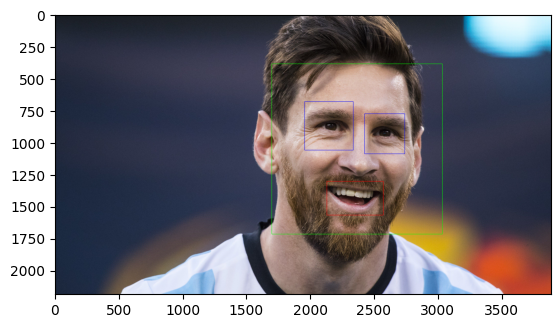

In [14]:
import matplotlib.pyplot as plt

# Display the final image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))